In [35]:
# Init stuff
import warnings                   # This block prevents display of harmless warnings, but should be
warnings.filterwarnings("ignore") # commented out till the final version, to avoid missing "real" warnings 
from pathlib import Path
import librosa
import soundfile
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa.display
from scipy import signal
import numpy as np


ORIGIN_PATH = '/Users/jpg/Documents/Nolasco'
MONO_PATH = '/Users/jpg/Documents/Nolasco - MONO'
CLEAN_PATH = '/Users/jpg/Documents/Nolasco - CLEAN'
FILTER_PATH = '/Users/jpg/Documents/Nolasco - FILTER'
NORMONO_PATH = '/Users/jpg/Documents/Nolasco - NORMONO'
SAMPLE_RATE = 22050

filenames = [
"CF001 - Missing Queen - Day -.mp3",
"GH001 - Active - Day - 141022_0659_0751.mp3",
"CF003 - Active - Day - (214).wav",
"CF003 - Active - Day - (215).wav",
"CF003 - Active - Day - (216).wav",
"CF003 - Active - Day - (217).wav",
"CF003 - Active - Day - (218).wav",
"CF003 - Active - Day - (219).wav",
"CF003 - Active - Day - (220).wav",
"CF003 - Active - Day - (221).wav",
"CF003 - Active - Day - (222).wav",
"CF003 - Active - Day - (223).wav",
"CF003 - Active - Day - (224).wav",
"CF003 - Active - Day - (225).wav",
"CF003 - Active - Day - (226).wav",
"CF003 - Active - Day - (227).wav",
"CJ001 - Missing Queen - Day -  (100).wav",
"CJ001 - Missing Queen - Day -  (101).wav",
"CJ001 - Missing Queen - Day -  (102).wav",
"CJ001 - Missing Queen - Day -  (103).wav",
"CJ001 - Missing Queen - Day -  (104).wav",
"Hive1_12_06_2018_QueenBee_H1_audio___15_00_00.wav",
"Hive1_12_06_2018_QueenBee_H1_audio___15_10_00.wav",
"Hive1_12_06_2018_QueenBee_H1_audio___15_30_00.wav",
"Hive1_12_06_2018_QueenBee_H1_audio___15_40_00.wav",
"Hive1_12_06_2018_QueenBee_H1_audio___16_50_00.wav",
"Hive1_12_06_2018_QueenBee_H1_audio___17_00_00.wav",
"Hive1_31_05_2018_NO_QueenBee_H1_audio___15_00_00.wav",
"Hive1_31_05_2018_NO_QueenBee_H1_audio___15_20_00.wav",
"Hive1_31_05_2018_NO_QueenBee_H1_audio___15_30_00.wav",
"Hive1_31_05_2018_NO_QueenBee_H1_audio___15_40_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___15_00_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___15_10_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___15_20_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___15_30_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___15_40_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___16_20_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___16_30_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___16_40_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___16_50_00.wav",
"Hive3_12_07_2017_NO_QueenBee_H3_audio___17_00_00.wav",
"Hive3_15_07_2017_NO_QueenBee_H3_audio___06_10_00.wav",
"Hive3_15_07_2017_NO_QueenBee_H3_audio___06_20_00.wav",
"Hive3_15_07_2017_NO_QueenBee_H3_audio___06_30_00.wav",
"Hive3_15_07_2017_NO_QueenBee_H3_audio___06_40_00.wav",
"Hive3_15_07_2017_NO_QueenBee_H3_audio___07_00_00.wav",
"Hive3_20_07_2017_QueenBee_H3_audio___06_10_00.wav",
"Hive3_20_07_2017_QueenBee_H3_audio___06_20_00.wav"
]

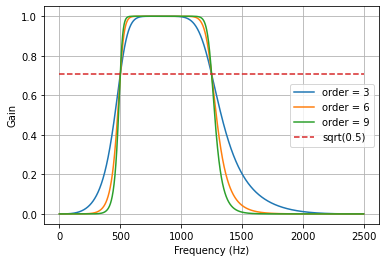

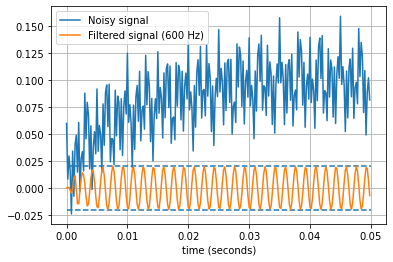

In [36]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

    
    
def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0
    #lowcut = 20.0
    #highcut = 2000.0
    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = sosfreqz(sos, worN=2000)
        
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    #y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)    
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


run()

In [37]:
# Build files


def normalize_rms(sig, rms_level=0):
    # linear rms level and scaling factor
    r = 10**(rms_level / 10.0)
    a = np.sqrt( (len(sig) * r**2) / np.sum(sig**2) )

    return sig * a


def convert(filename, sample_rate, lowcut, highcut):
    input_path = str(Path(ORIGIN_PATH, filename))
    mono_path = str(Path(MONO_PATH, Path(filename).stem + '.wav'))
    clean_path = str(Path(CLEAN_PATH, Path(filename).stem + '.wav'))   
    filter_path = str(Path(FILTER_PATH, Path(filename).stem + '.wav'))     
    
    sig, sr = librosa.core.load(input_path, sr=sample_rate, mono = False)
    #print("name", sig.shape, sig.ndim, sig.dtype)
    
    if sig.ndim == 2:
        sig = sig[0,]
        #print('mono', sig.shape, sig.ndim, sig.dtype)
        
    soundfile.write(mono_path, sig, sr)

    sig = butter_bandpass_filter(sig, lowcut, highcut, sr, order=9)
    soundfile.write(filter_path, sig, sr)     
    
    sig = normalize_rms(sig, rms_level=-3)
    soundfile.write(clean_path, sig, sr)    
    return


#for filename in filenames:
#    print(filename)
#    convert(filename, SAMPLE_RATE, 100, 500)

#convert(filenames[1], SAMPLE_RATE, 100, 500)

In [40]:
def normono(filename, sample_rate):
    input_path = str(Path(MONO_PATH, filename))
    output_path = str(Path(NORMONO_PATH, Path(filename).stem + '.wav'))
    sig, sr = librosa.core.load(input_path, sr=sample_rate, mono = False)
    soundfile.write(output_path, normalize_rms(sig, rms_level=-3), sr)
    
for filename in filenames:
    print(filename)
    normono(filename, SAMPLE_RATE)

CF001 - Missing Queen - Day -.wav
GH001 - Active - Day - 141022_0659_0751.wav
CF003 - Active - Day - (214).wav
CF003 - Active - Day - (215).wav
CF003 - Active - Day - (216).wav
CF003 - Active - Day - (217).wav
CF003 - Active - Day - (218).wav
CF003 - Active - Day - (219).wav
CF003 - Active - Day - (220).wav
CF003 - Active - Day - (221).wav
CF003 - Active - Day - (222).wav
CF003 - Active - Day - (223).wav
CF003 - Active - Day - (224).wav
CF003 - Active - Day - (225).wav
CF003 - Active - Day - (226).wav
CF003 - Active - Day - (227).wav
CJ001 - Missing Queen - Day -  (100).wav
CJ001 - Missing Queen - Day -  (101).wav
CJ001 - Missing Queen - Day -  (102).wav
CJ001 - Missing Queen - Day -  (103).wav
CJ001 - Missing Queen - Day -  (104).wav
Hive1_12_06_2018_QueenBee_H1_audio___15_00_00.wav
Hive1_12_06_2018_QueenBee_H1_audio___15_10_00.wav
Hive1_12_06_2018_QueenBee_H1_audio___15_30_00.wav
Hive1_12_06_2018_QueenBee_H1_audio___15_40_00.wav
Hive1_12_06_2018_QueenBee_H1_audio___16_50_00.wav
Hive1